In [2]:
import numpy as np
from econml.dml import DML, LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt

# Case1: 効果の異質性がないケース
- Y: 顧客一人当たりの購買金額
- T: 介入（0: コントロール, 1: 介入）
- X: 顧客の年齢

## データの生成
- 顧客の購買金額は、100 + 年齢効果 + 介入効果 + ノイズ
  - 年齢効果は年齢が1増加すると購買金額が1増加するとする
  - 介入効果は介入を受けた場合に購買金額が10増加するとする

In [3]:
# データの生成
np.random.seed(0)
N = 1000
X = np.random.randint(20, 60, N)
T = np.random.randint(0, 2, N)

age_effect = X
treatment_effect = T * 10
noise = np.random.normal(0, 1, N)

Y = 10 + age_effect + treatment_effect + noise

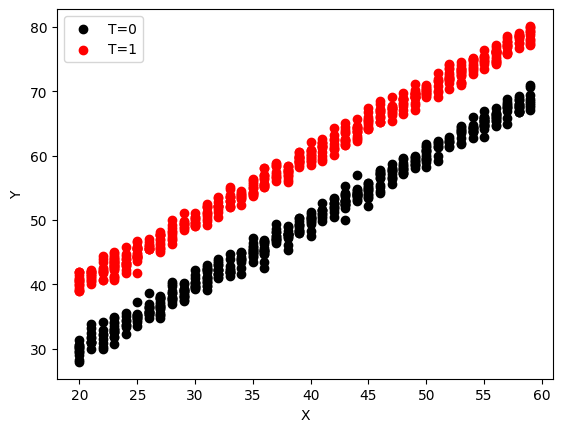

In [4]:
# データのプロット
# T=0のデータを黒でプロット
plt.scatter(X[T == 0], Y[T == 0], color='black', label='T=0')
# T=1のデータを赤でプロット
plt.scatter(X[T == 1], Y[T == 1], color='red', label='T=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
model = LinearDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

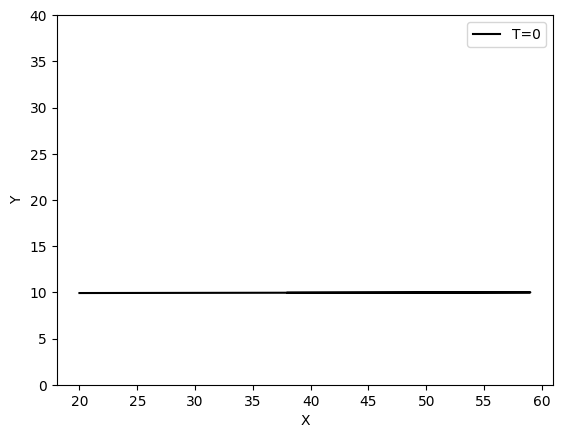

In [6]:
# プロット
plt.plot(X[T == 0], Y_pred[T == 0], color='black', label='T=0')
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Case2: 効果の異質性がなく、共変量の影響が加わるるケース
- Y: 顧客一人当たりの購買金額
- T: 介入（0: コントロール, 1: 介入）
- X: 顧客の年齢
- W: 顧客の性別

## データの生成
- 顧客の購買金額は、100 + 年齢効果 + 介入効果 + 性別効果 + ノイズ
  - 年齢効果は年齢が1増加すると購買金額が1増加するとする
  - 介入効果は介入を受けた場合に購買金額が10増加するとする
  - 性別効果は女性の場合購買金額が20増加するとする

In [7]:
# データの生成
np.random.seed(0)
N = 1000
X = np.random.randint(20, 60, N)
T = np.random.randint(0, 2, N)
W = np.random.randint(0, 2, N)

age_effect = X
treatment_effect = T * 10
sex_effect = W * 20
noise = np.random.normal(0, 1, N)

Y = 10 + age_effect + treatment_effect + sex_effect + noise

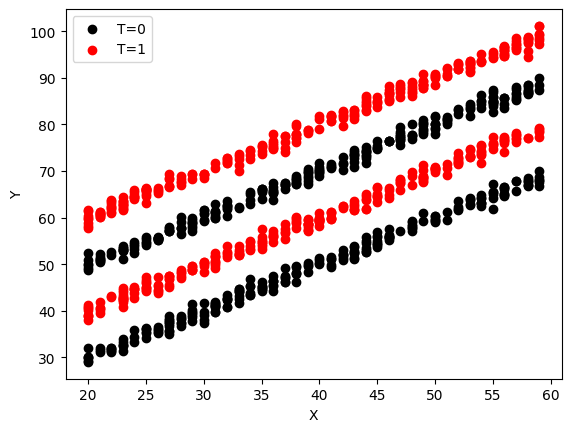

In [8]:
# データのプロット
# T=0のデータを黒でプロット
plt.scatter(X[T == 0], Y[T == 0], color='black', label='T=0')
# T=1のデータを赤でプロット
plt.scatter(X[T == 1], Y[T == 1], color='red', label='T=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [9]:
model = LinearDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1),W = W.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

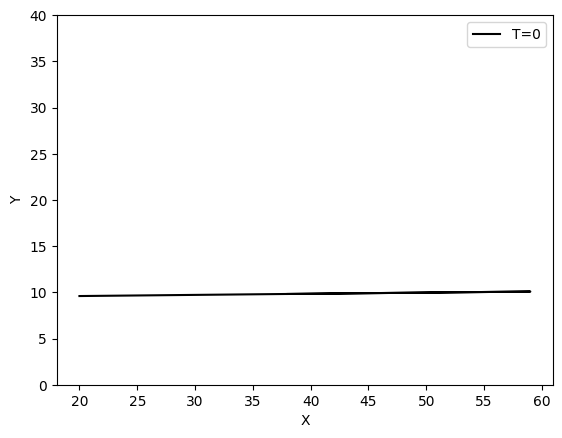

In [10]:
# プロット
plt.plot(X[T == 0], Y_pred[T == 0], color='black', label='T=0')
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Case3: Xが線形に影響を与え、共変量の影響が加わるるケース
- Y: 顧客一人当たりの購買金額
- T: 介入（0: コントロール, 1: 介入）
- X: 顧客の年齢
- W: 顧客の性別

## データの生成
- 顧客の購買金額は、100 + 年齢効果 + 性別効果 + 介入効果 + ノイズ
  - 年齢効果は年齢が1増加すると購買金額が1増加する
  - 性別効果は女性の場合購買金額が20増加するとする
  - 介入効果は介入を受けた場合に年齢の分だけ購買金額が増加するとする

In [11]:
# データの生成
np.random.seed(0)
N = 1000
X = np.random.randint(20, 60, N)
T = np.random.randint(0, 2, N)
W = np.random.randint(0, 2, N)

age_effect = X
treatment_effect = T * X
sex_effect = W * 20
noise = np.random.normal(0, 1, N)

Y = 10 + age_effect + treatment_effect + sex_effect + noise

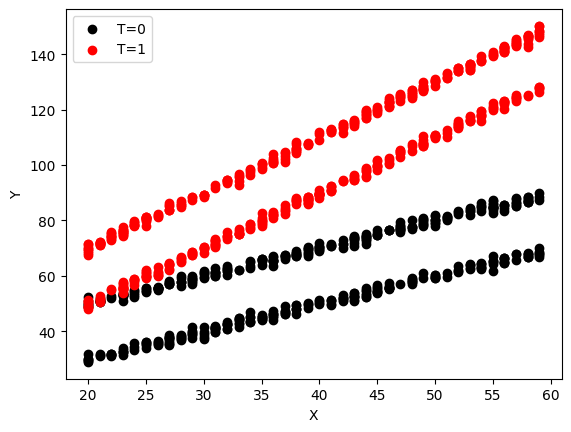

In [12]:
# データのプロット
# T=0のデータを黒でプロット
plt.scatter(X[T == 0], Y[T == 0], color='black', label='T=0')
# T=1のデータを赤でプロット
plt.scatter(X[T == 1], Y[T == 1], color='red', label='T=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
model = LinearDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1),W = W.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

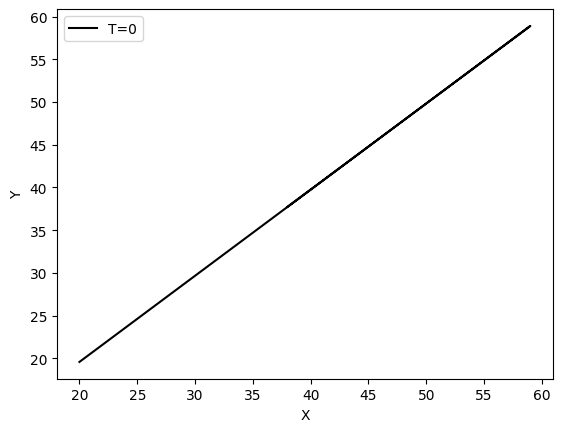

In [14]:
# プロット
plt.plot(X[T == 0], Y_pred[T == 0], color='black', label='T=0')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Case4: Xが非線形に影響を与え、共変量の影響が加わるるケース
- Y: 顧客一人当たりの購買金額
- T: 介入（0: コントロール, 1: 介入）
- X: 顧客の年齢
- W: 顧客の性別

## データの生成
- 顧客の購買金額は、100 + 年齢効果 + 性別効果 + 介入効果 + ノイズ
  - 年齢効果は年齢が1増加すると購買金額が1増加するが
  - 性別効果は女性の場合購買金額が20増加するとする
  - 介入効果は介入を受けた場合、30歳未満の場合は年齢の分だけ購買金額が増加するが、年齢が30を超えると1歳ごとに購買金額が1減少するとする

In [15]:
# データの生成
np.random.seed(0)
N = 1000
X = np.random.randint(20, 60, N)
T = np.random.randint(0, 2, N)
W = np.random.randint(0, 2, N)

age_effect = X
# treatment_effectはXが30未満の場合はT*X, 30以上の場合はT*(-X)+30
treatment_effect = np.where(X < 30, T * X, T * (-X + 60))
sex_effect = W * 20
noise = np.random.normal(0, 1, N)

Y = 10 + age_effect + treatment_effect + sex_effect + noise

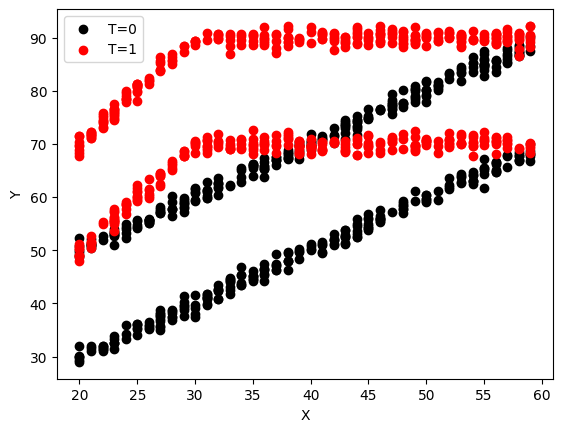

In [16]:
# データのプロット
# T=0のデータを黒でプロット
plt.scatter(X[T == 0], Y[T == 0], color='black', label='T=0')
# T=1のデータを赤でプロット
plt.scatter(X[T == 1], Y[T == 1], color='red', label='T=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [17]:
model = LinearDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1),W = W.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

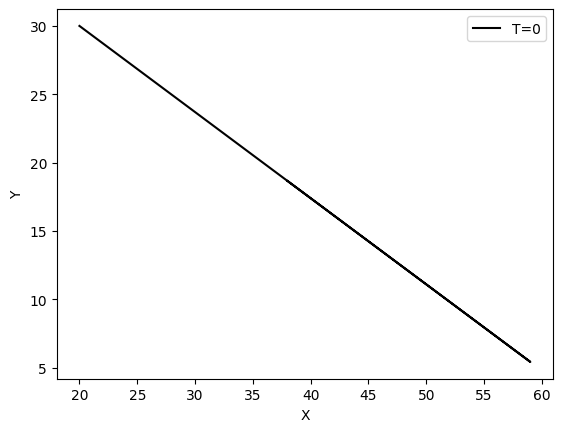

In [18]:
# プロット
plt.plot(X[T == 0], Y_pred[T == 0], color='black', label='T=0')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [19]:
model = CausalForestDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1),W = W.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

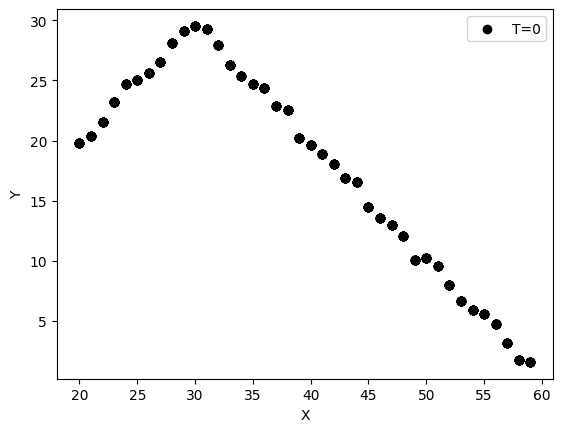

In [20]:
# プロット
plt.scatter(X[T == 1], Y_pred[T == 1], color='black', label='T=0')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Case5: XがWと交絡し非線形に影響を与え、共変量の影響が加わるるケース
- Y: 顧客一人当たりの購買金額
- T: 介入（0: コントロール, 1: 介入）
- X: 顧客の年齢
- W: 顧客の性別

## データの生成
- 顧客の購買金額は、100 + 年齢効果 + 性別効果 + 介入効果 + ノイズ
  - 年齢効果は年齢が1増加すると購買金額が1増加するが
  - 性別効果は女性の場合購買金額が20増加するとする
  - 介入効果
    - 男性: 30歳未満の場合は年齢の分だけ購買金額が増加するが、年齢が30を超えると1歳ごとに購買金額が1減少するとする
    - 女性: 30歳未満の場合は年齢の分だけ購買金額が減少するが、年齢が30を超えると1歳ごとに購買金額が1増加するとする

In [35]:
# データの生成
np.random.seed(0)
N = 1000
X = np.random.randint(20, 60, N)
T = np.random.randint(0, 2, N)
W = np.random.randint(0, 2, N)

age_effect = X
treatment_effect = np.where(X < 30, T * X, T * (-X + 60)) * np.where(W == 1, 1,-1)
sex_effect = W * 20
noise = np.random.normal(0, 1, N)

Y = 10 + age_effect + treatment_effect + sex_effect + noise

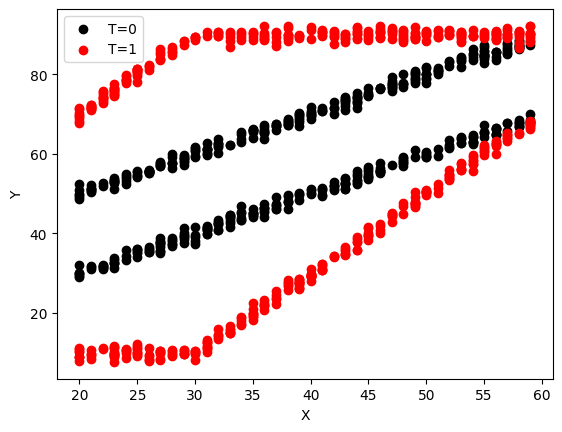

In [36]:
# データのプロット
# T=0のデータを黒でプロット
plt.scatter(X[T == 0], Y[T == 0], color='black', label='T=0')
# T=1のデータを赤でプロット
plt.scatter(X[T == 1], Y[T == 1], color='red', label='T=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [37]:
model = LinearDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1),W = W.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

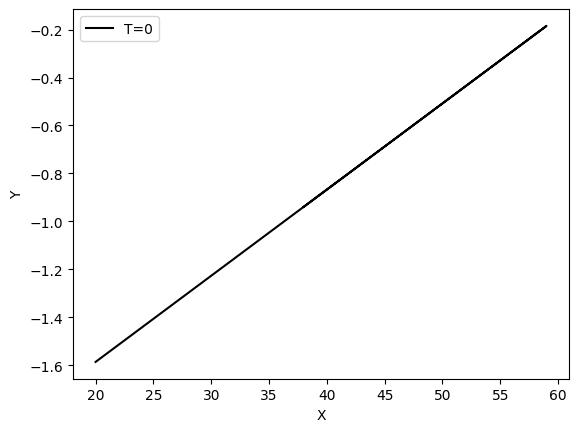

In [38]:
# プロット
plt.plot(X[T == 0], Y_pred[T == 0], color='black', label='T=0')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [39]:
model = CausalForestDML(
  model_y=RandomForestRegressor(),
  model_t=RandomForestRegressor(),
)
model.fit(Y, T, X = X.reshape(-1, 1),W = W.reshape(-1, 1))
Y_pred = model.effect(X.reshape(-1, 1))

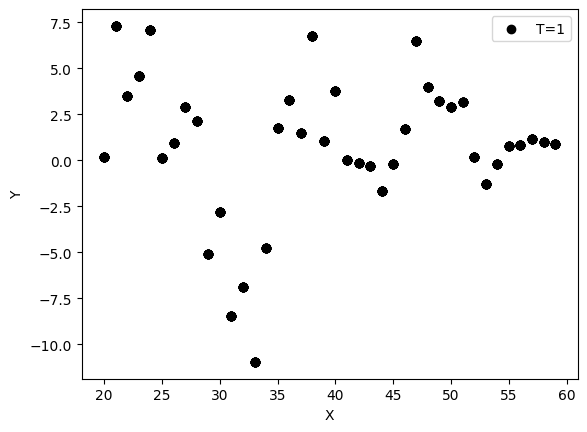

In [40]:
# プロット
plt.scatter(X[T == 1], Y_pred[T == 1], color='black', label='T=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

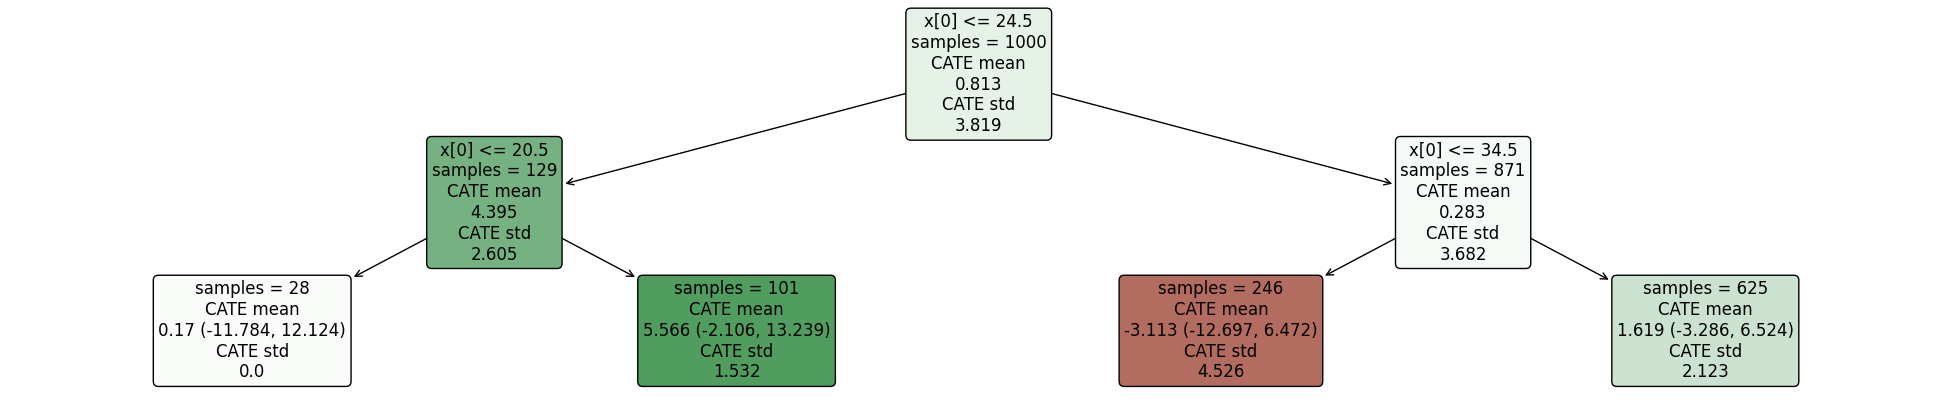

In [42]:
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10)
intrp.interpret(model, X.reshape(-1, 1))
plt.figure(figsize=(25, 5))
intrp.plot(fontsize=12)